In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

In [2]:
sp500 = pd.read_csv('S&P500 Daily Returns.csv')

sp500['RET'] = pd.to_numeric(sp500['RET'], errors='coerce')
sp500['RETX'] = pd.to_numeric(sp500['RETX'], errors='coerce')
sp500.head(10)

C:\Users\joel3\AppData\Local\Temp\ipykernel_8716\3551061304.py:1: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  sp500 = pd.read_csv('S&P500 Daily Returns.csv')


,PERMNO,date,SICCD,TICKER,COMNAM,HSICIG,BIDLO,ASKHI,PRC,VOL,RET,SHROUT,NUMTRD,RETX,sprtrn,enterdate,positive,negative,total,market_cap
0,10104,2023-01-03,7372.0,ORCL,ORACLE CORP,NaN,82.260,83.8400,83.72,8997534.0,0.024223,2696253.0,NaN,0.024223,-0.004001,NaN,0.0,0.0,0.0,2.257303e+08
1,10104,2023-01-04,7372.0,ORCL,ORACLE CORP,NaN,83.640,85.1700,84.48,7836238.0,0.009078,2696253.0,NaN,0.009078,0.007539,NaN,0.0,0.0,0.0,2.277795e+08
2,10104,2023-01-05,7372.0,ORCL,ORACLE CORP,NaN,83.220,85.4000,84.31,7643784.0,-0.002012,2696253.0,NaN,-0.002012,-0.011646,NaN,0.0,0.0,0.0,2.273211e+08
3,10104,2023-01-06,7372.0,ORCL,ORACLE CORP,NaN,83.820,86.3400,85.66,8641597.0,0.016012,2696253.0,NaN,0.016012,0.022841,NaN,0.0,0.0,0.0,2.309610e+08
4,10104,2023-01-09,7372.0,ORCL,ORACLE CORP,NaN,86.160,87.5900,86.42,7519836.0,0.012608,2696253.0,NaN,0.008872,-0.000768,NaN,0.0,0.0,0.0,2.330102e+08
5,10104,2023-01-10,7372.0,ORCL,ORACLE CORP,NaN,85.570,86.6100,86.50,5703270.0,0.000926,2696253.0,NaN,0.000926,0.006978,NaN,0.0,0.0,0.0,2.332259e+08
6,10104,2023-01-11,7372.0,ORCL,ORACLE CORP,NaN,87.090,88.6600,88.60,8359667.0,0.024277,2696253.0,NaN,0.024277,0.012849,NaN,0.0,0.0,0.0,2.388880e+08
7,10104,2023-01-12,7372.0,ORCL,ORACLE CORP,NaN,88.170,89.1950,88.78,6071099.0,0.002032,2696253.0,NaN,0.002032,0.003416,2023-01-12,1.0,0.0,1.0,2.393733e+08
8,10104,2023-01-13,7372.0,ORCL,ORACLE CORP,NaN,87.660,89.4662,89.20,5090938.0,0.004731,2696253.0,NaN,0.004731,0.003997,NaN,0.0,0.0,0.0,2.405058e+08
9,10104,2023-01-17,7372.0,ORCL,ORACLE CORP,NaN,88.425,89.4400,88.60,6550412.0,-0.006726,2696253.0,NaN,-0.006726,-0.002030,2023-01-17,0.0,0.0,1.0,2.388880e+08


             SICCD    market_cap        SHROUT           VOL            PRC  \
count  5960.000000  5.960000e+03  5.960000e+03  5.960000e+03    5960.000000   
mean   5202.917785  7.136964e+07  6.503914e+05  4.992232e+06     703.770873   
std    2291.789278  1.914106e+08  1.247160e+06  1.065649e+07   11445.146556   
min     721.000000  2.159880e+06  3.179000e+03  1.653370e+04       3.581364   
25%    3571.000000  1.573788e+07  1.398685e+05  1.003126e+06      62.521533   
50%    4925.000000  2.834096e+07  2.837799e+05  1.972086e+06     109.830500   
75%    7011.000000  5.653965e+07  6.096320e+05  4.601625e+06     209.314944   
max    9999.000000  3.022032e+09  1.583174e+07  1.947476e+08  275845.278937   

               ASKHI        BIDLO        total     negative     positive  \
count    5960.000000  5960.000000  5960.000000  5960.000000  5960.000000   
mean     1258.784391   178.748318     6.593624     0.052181     0.802349   
std     23557.408884   339.105625     7.058262     0.259335 

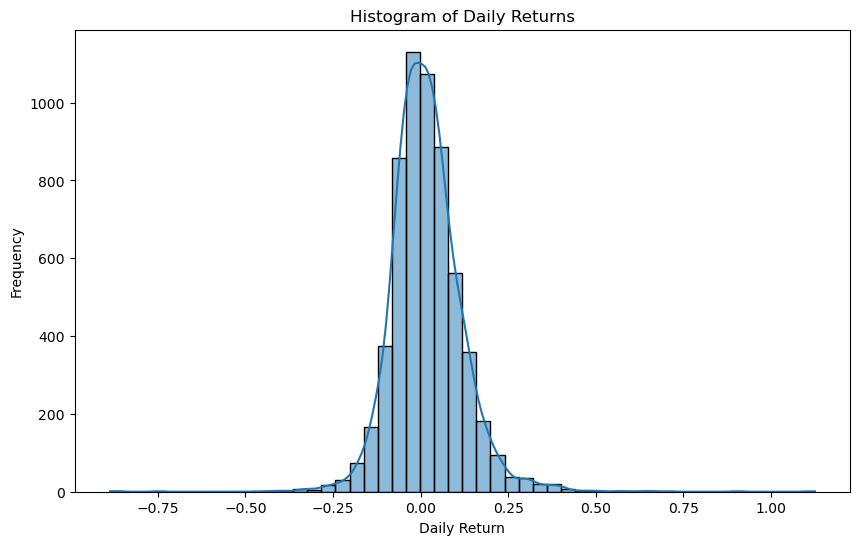

In [3]:
# Change date format
sp500['date'] = pd.to_datetime(sp500['date'], format='%Y-%m-%d')

# Remove the columns HSICIG and enterdate
sp500.drop(columns=['HSICIG', 'enterdate', 'NUMTRD'], inplace=True)

# Reset index
sp500.reset_index(drop=True, inplace=True)

# Convert columns to numeric if necessary
sp500['RET'] = pd.to_numeric(sp500['RET'], errors='coerce')


# Group by month and ticker and perform aggregations
agg_columns = {
    'SICCD': 'first',
    'COMNAM': 'first',
    'market_cap': 'mean',
    'SHROUT': 'mean',
    'VOL': 'mean',
    'PRC': 'mean',
    'ASKHI': 'max',
    'BIDLO': 'min',
    'total': 'sum',
    'negative': 'sum',
    'positive': 'sum',
    'sprtrn': lambda x: (1 + x).prod() - 1,
    'RET': lambda x: (1 + x).prod() - 1
}

# Group by 'TICKER' and resample the data to monthly frequency
sp500 = sp500.groupby('TICKER').resample('M', on='date').agg(agg_columns).reset_index()

# Adding lagged columns
sp500['next_month_return'] = sp500.groupby('TICKER')['RET'].shift(-1)
sp500['last_month_return'] = sp500.groupby('TICKER')['RET'].shift(1)
sp500['last_month_volume'] = sp500.groupby('TICKER')['VOL'].shift(1)

# Add columns for moving averages
sp500['1_month_ma'] = sp500.groupby('TICKER')['PRC'].rolling(window=1).mean().reset_index(drop=True)
sp500['2_month_ma'] = sp500.groupby('TICKER')['PRC'].rolling(window=2).mean().reset_index(drop=True)
sp500['3_month_ma'] = sp500.groupby('TICKER')['PRC'].rolling(window=3).mean().reset_index(drop=True)

# Create "proper?" column
sp500['proper?'] = (sp500['1_month_ma'] > sp500['2_month_ma']) & (sp500['2_month_ma'] > sp500['3_month_ma']).astype(int)

# Create price minus 
sp500['Ask_minus_Bid'] = sp500['ASKHI'] - sp500['BIDLO']

# Create comp_size column
sp500['comp_size'] = pd.qcut(sp500['market_cap'], q=10, labels=False)

# Display summary statistics
print(sp500.describe())

# Plot histogram of returns
plt.figure(figsize=(10, 6))
sns.histplot(data=sp500, x='RET', bins=50, kde=True)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


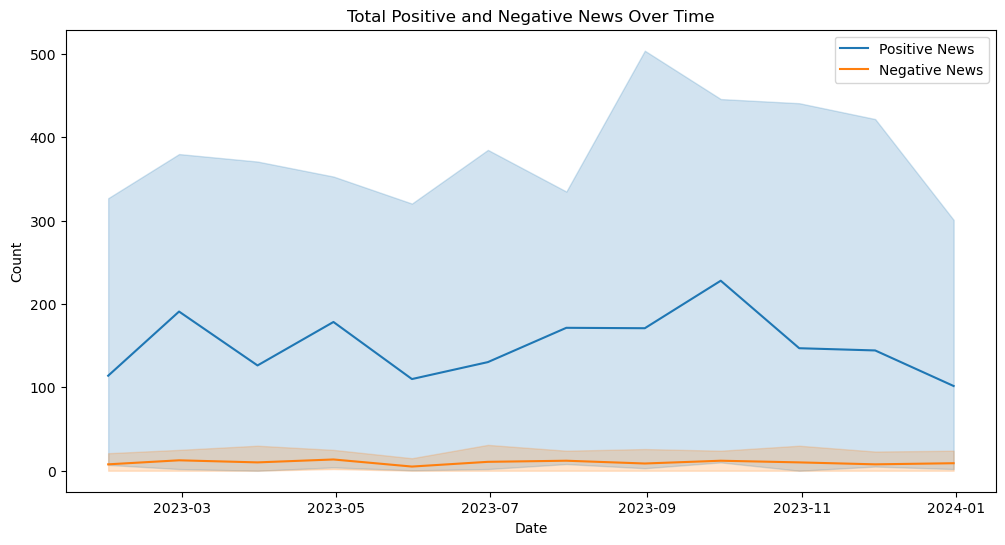

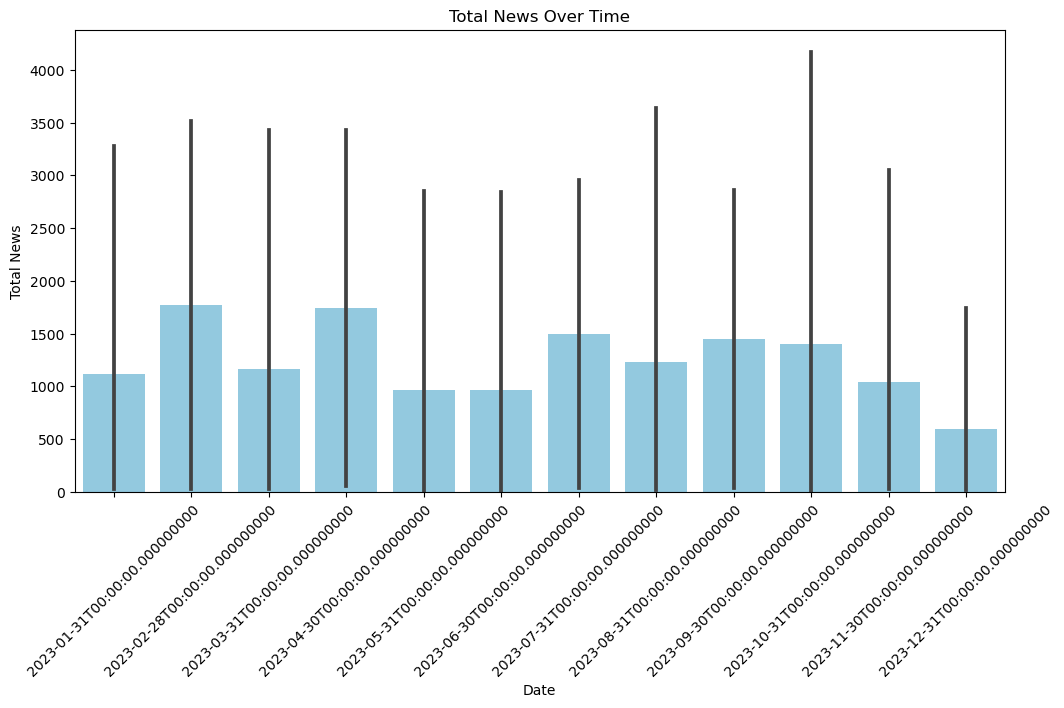

In [4]:
# Daily aggregation
daily_summary = sp500.groupby(['date', 'sprtrn']).agg(
    sum_positive=('positive', 'sum'),
    sum_negative=('negative', 'sum'),
    sum_total=('total', 'sum')
).reset_index()

# Plot line chart of total positive and negative news over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_summary, x='date', y='sum_positive', label='Positive News')
sns.lineplot(data=daily_summary, x='date', y='sum_negative', label='Negative News')
plt.title('Total Positive and Negative News Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plot bar chart of total news over time
plt.figure(figsize=(12, 6))
sns.barplot(data=daily_summary, x='date', y='sum_total', color='skyblue')
plt.title('Total News Over Time')
plt.xlabel('Date')
plt.ylabel('Total News')
plt.xticks(rotation=45)
plt.show()

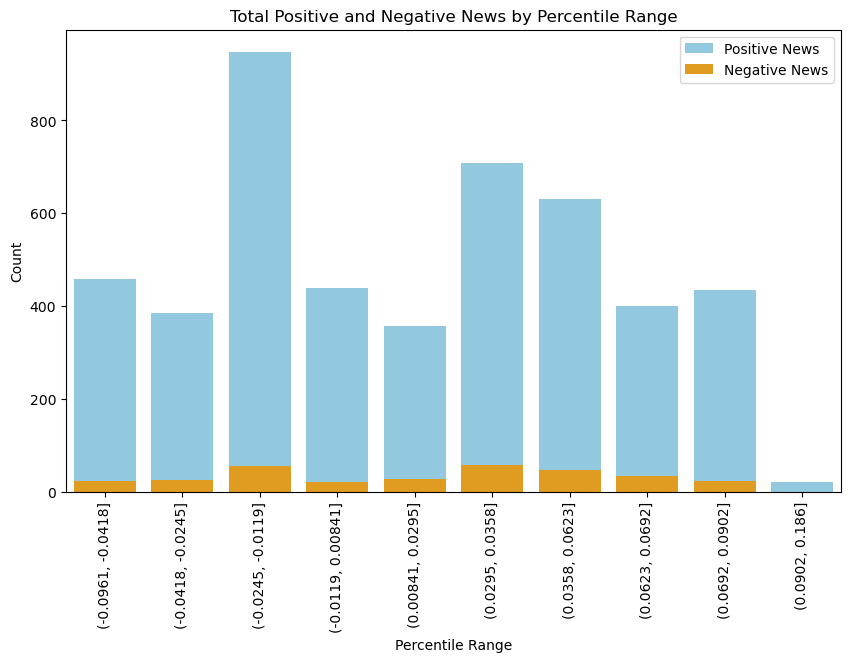

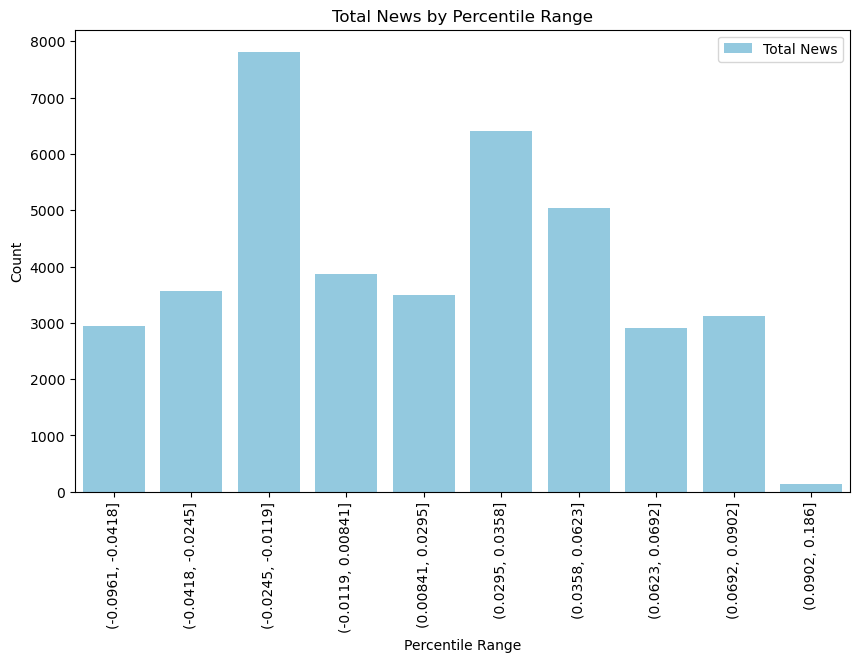

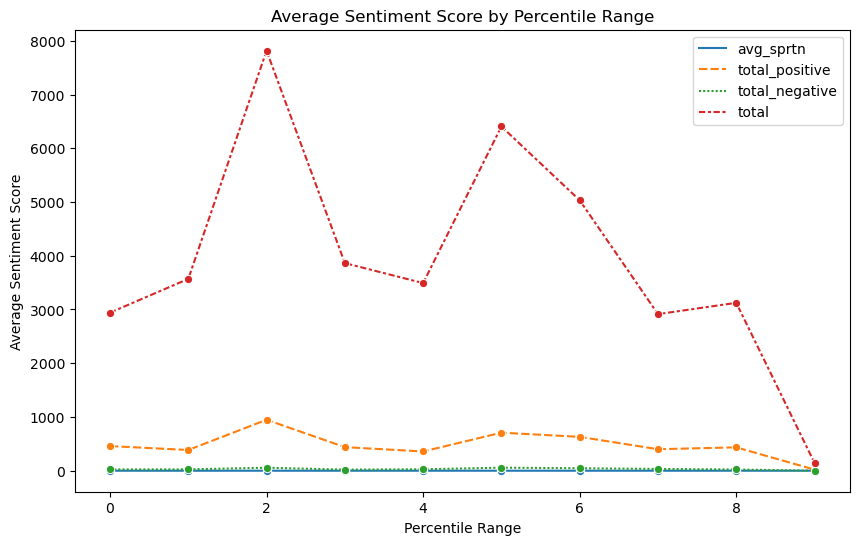

In [5]:
# Percentile summary
ranked_sprtrn = daily_summary.copy()
ranked_sprtrn['sprtrn_percentile'] = pd.qcut(ranked_sprtrn['sprtrn'], q=10, labels=False)
ranked_sprtrn['percentile_range'] = pd.qcut(ranked_sprtrn['sprtrn'], q=10)

percentile_summary = ranked_sprtrn.groupby('percentile_range').agg(
    avg_sprtn=('sprtrn', 'mean'),
    total_positive=('sum_positive', 'sum'),
    total_negative=('sum_negative', 'sum'),
    total=('sum_total', 'sum')
).reset_index()

# Plot bar chart of total positive and negative news by percentile range
plt.figure(figsize=(10, 6))
sns.barplot(data=percentile_summary, x='percentile_range', y='total_positive', color='skyblue', label='Positive News')
sns.barplot(data=percentile_summary, x='percentile_range', y='total_negative', color='orange', label='Negative News')
plt.title('Total Positive and Negative News by Percentile Range')
plt.xlabel('Percentile Range')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.legend()
plt.show()

# Plot bar chart of total positive and negative news by percentile range
plt.figure(figsize=(10, 6))
sns.barplot(data=percentile_summary, x='percentile_range', y='total', color='skyblue', label='Total News')
plt.title('Total News by Percentile Range')
plt.xlabel('Percentile Range')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.legend()
plt.show()

# Plot line chart of average sentiment score by percentile range
plt.figure(figsize=(10, 6))
sns.lineplot(data=percentile_summary.drop(columns='percentile_range'), marker='o', color='green')
plt.title('Average Sentiment Score by Percentile Range')
plt.xlabel('Percentile Range')
plt.ylabel('Average Sentiment Score')
plt.show()


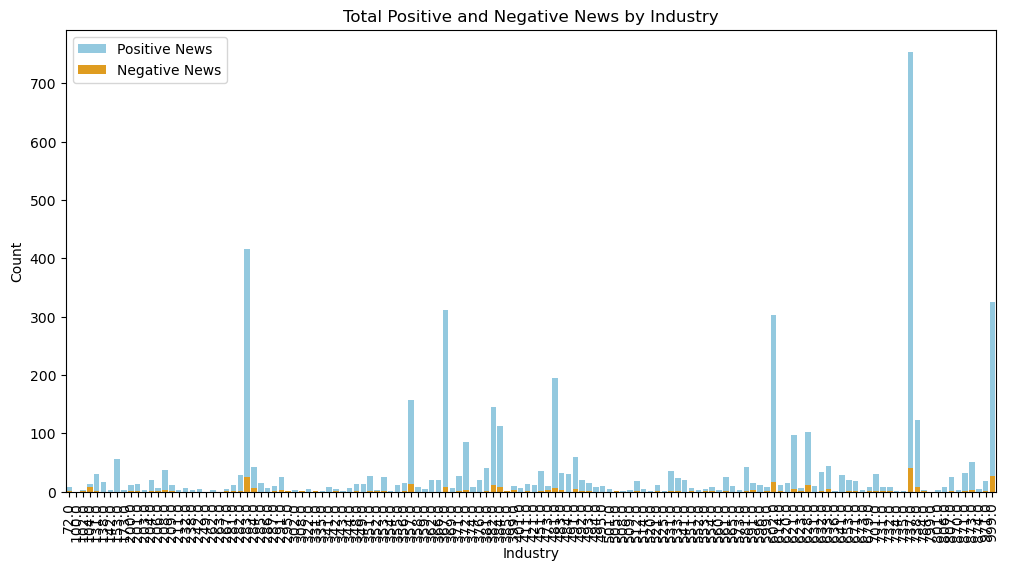

In [6]:
# Industry summary
industry_summary = sp500.groupby(sp500['SICCD'] // 10).agg(
    num_firms=('TICKER', 'nunique'),
    cum_ret=('RET', 'sum'),
    total_positive=('positive', 'sum'),
    total_negative=('negative', 'sum'),
    total=('total', 'sum')
).reset_index()

industry_summary['positive_perc'] = industry_summary['total_positive'] / industry_summary['total']
industry_summary['negative_perc'] = industry_summary['total_negative'] / industry_summary['total']

# Plot bar chart of total positive and negative news by industry
plt.figure(figsize=(12, 6))
sns.barplot(data=industry_summary, x='SICCD', y='total_positive', color='skyblue', label='Positive News')
sns.barplot(data=industry_summary, x='SICCD', y='total_negative', color='orange', label='Negative News')
plt.title('Total Positive and Negative News by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.legend()
plt.show()


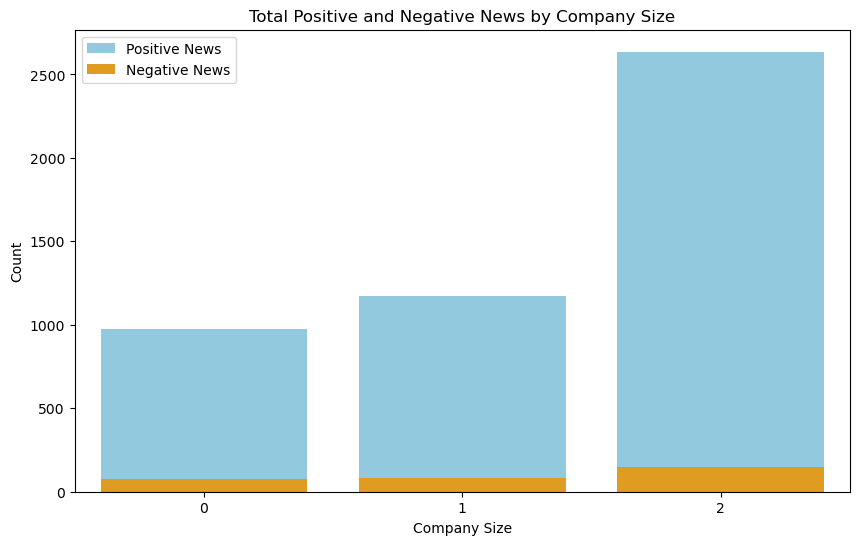

In [7]:
# Company size summary
stock_size = sp500.copy()
stock_size['comp_size'] = pd.qcut(stock_size['market_cap'], q=3, labels=False)
company_size_summary = stock_size.groupby('comp_size').agg(
    sum_ret=('RET', 'sum'),
    total_positive=('positive', 'sum'),
    total_negative=('negative', 'sum'),
    total=('total', 'sum')
).reset_index()

company_size_summary['positive_perc'] = company_size_summary['total_positive'] / company_size_summary['total']
company_size_summary['negative_perc'] = company_size_summary['total_negative'] / company_size_summary['total']

# Plot bar chart of total positive and negative news by company size
plt.figure(figsize=(10, 6))
sns.barplot(data=company_size_summary, x='comp_size', y='total_positive', color='skyblue', label='Positive News')
sns.barplot(data=company_size_summary, x='comp_size', y='total_negative', color='orange', label='Negative News')
plt.title('Total Positive and Negative News by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.legend()
plt.show()


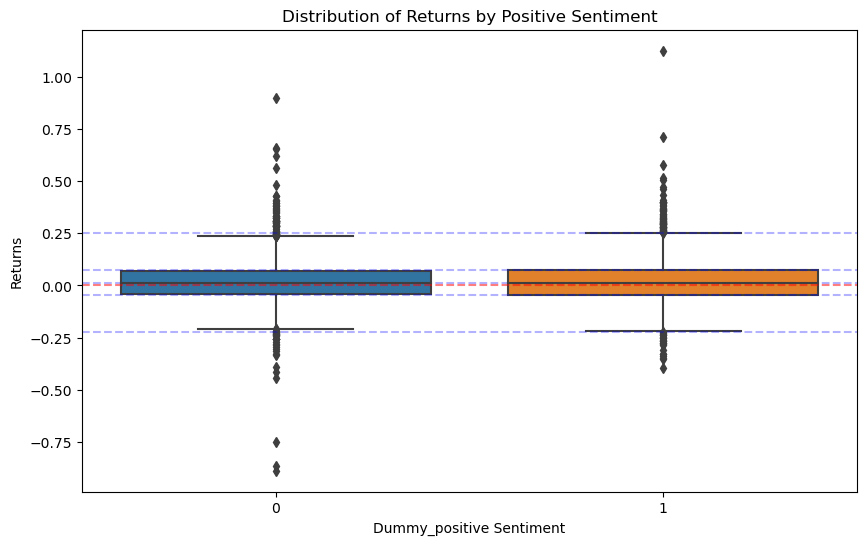

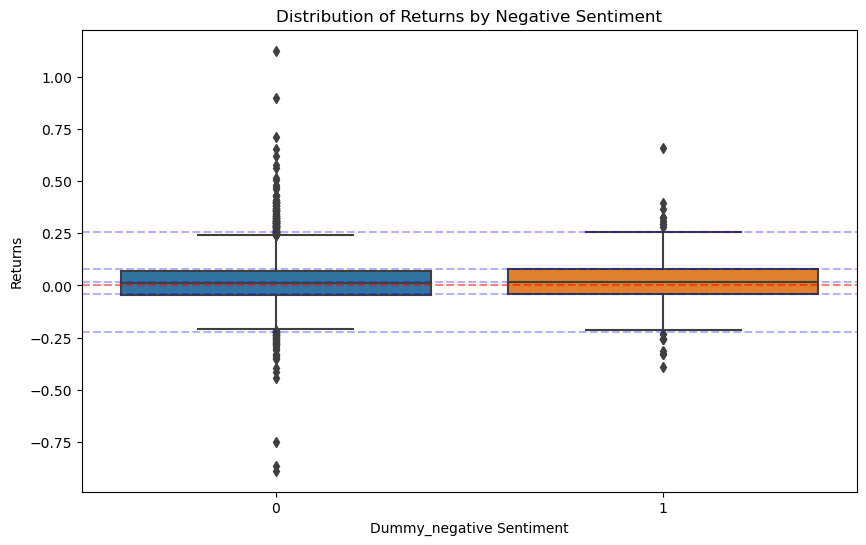

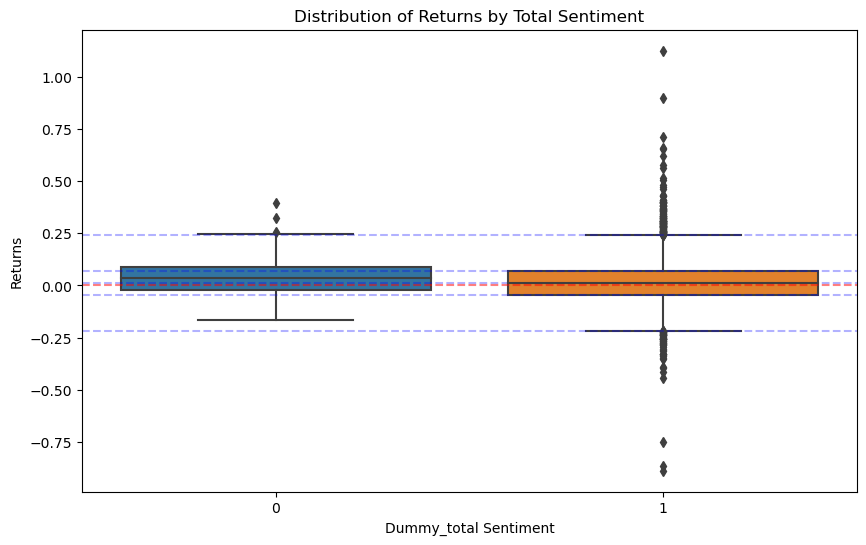

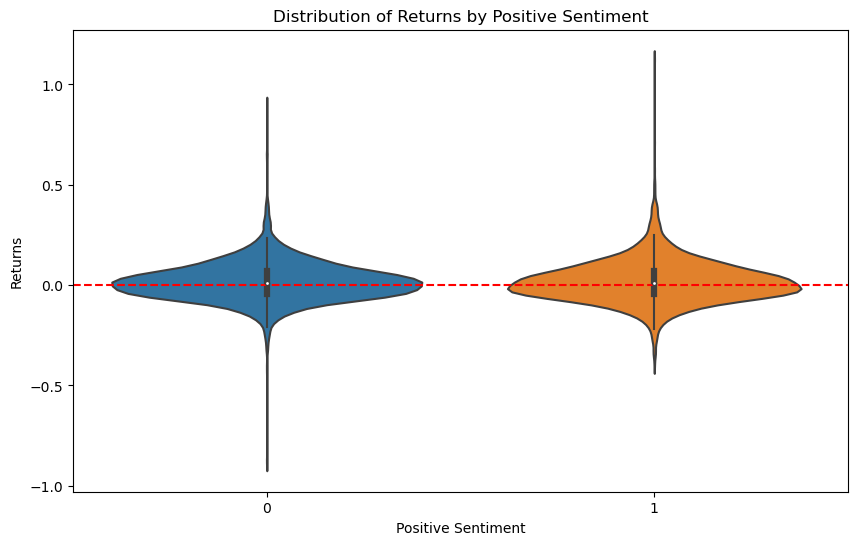

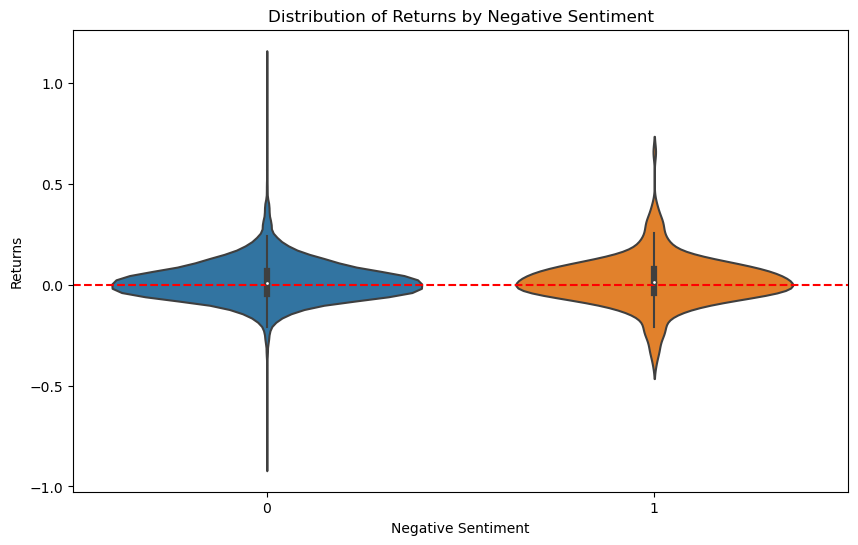

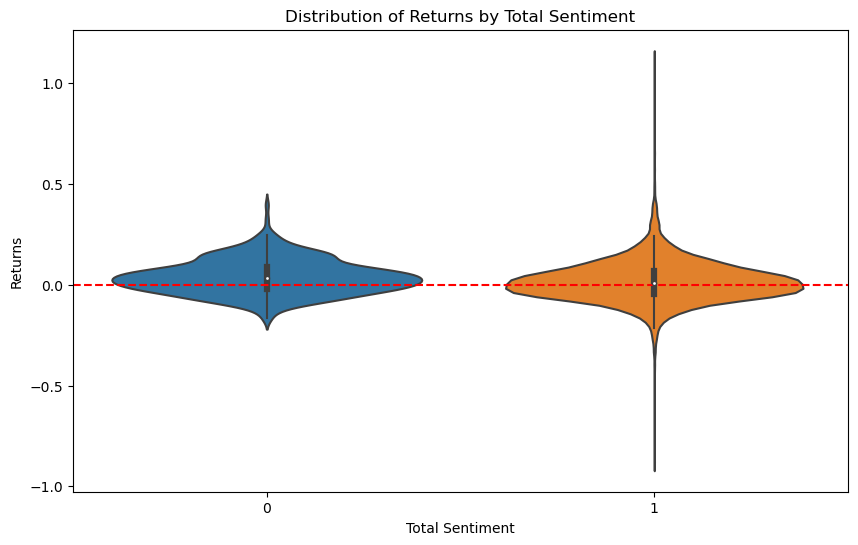

In [8]:
# Create dummy_negative column
sp500['dummy_negative'] = (sp500['negative'] >= 1).astype(int)

# Create dummy_positive column
sp500['dummy_positive'] = (sp500['positive'] >= 1).astype(int)

# Create dummy_total column
sp500['dummy_total'] = (sp500['total'] >= 1).astype(int)


# Function to plot with additional lines
def plot_with_lines(data, x_col, y_col, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_col, y=y_col, data=data)
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    # Add blue dashed lines for critical points of value >= 1 category
    for i, box in enumerate(data.groupby(x_col)[y_col]):
        if box[0] == 1:
            quartiles = box[1].quantile([0.25, 0.5, 0.75])
            plt.axhline(y=quartiles[0.25], color='blue', linestyle='--', alpha=0.3)
            plt.axhline(y=quartiles[0.5], color='blue', linestyle='--', alpha=0.3)
            plt.axhline(y=quartiles[0.75], color='blue', linestyle='--', alpha=0.3)              
            iqr = quartiles[0.75] - quartiles[0.25]
            upper_limit = 1.5 * iqr + quartiles[0.75]
            lower_limit = quartiles[0.25] - 1.5 * iqr
            # Add additional blue dashed lines
            plt.axhline(y=upper_limit, color='blue', linestyle='--', alpha=0.3)  # Upper limit
            plt.axhline(y=lower_limit, color='blue', linestyle='--', alpha=0.3)  # Lower limit
    plt.title(title)
    plt.xlabel(x_col.capitalize() + ' Sentiment')
    plt.ylabel('Returns')
    plt.show()


# Box plot for dummy_positive
plot_with_lines(sp500, 'dummy_positive', 'RET', 'Distribution of Returns by Positive Sentiment')

# Box plot for dummy_negative
plot_with_lines(sp500, 'dummy_negative', 'RET', 'Distribution of Returns by Negative Sentiment')

# Box plot for dummy_total
plot_with_lines(sp500, 'dummy_total', 'RET', 'Distribution of Returns by Total Sentiment')

# Violin plot for dummy_positive
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_positive', y='RET', data=sp500)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Positive Sentiment')
plt.xlabel('Positive Sentiment')
plt.ylabel('Returns')
plt.show()

# Violin plot for dummy_negative
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_negative', y='RET', data=sp500)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Negative Sentiment')
plt.xlabel('Negative Sentiment')
plt.ylabel('Returns')
plt.show()

# Violin plot for dummy_total
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_total', y='RET', data=sp500)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Total Sentiment')
plt.xlabel('Total Sentiment')
plt.ylabel('Returns')
plt.show()


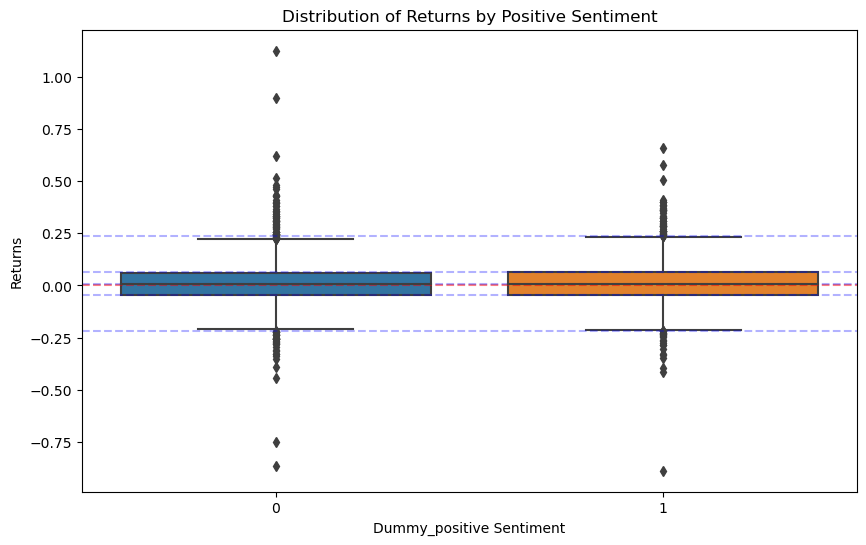

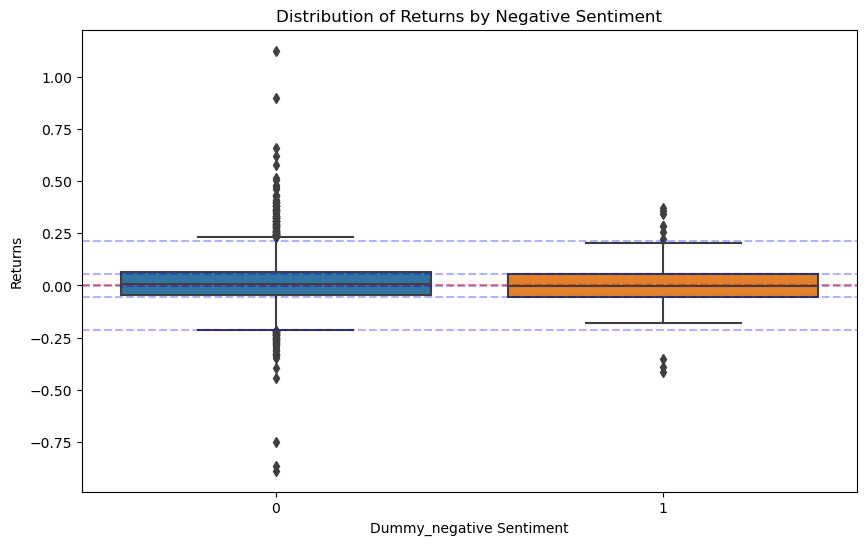

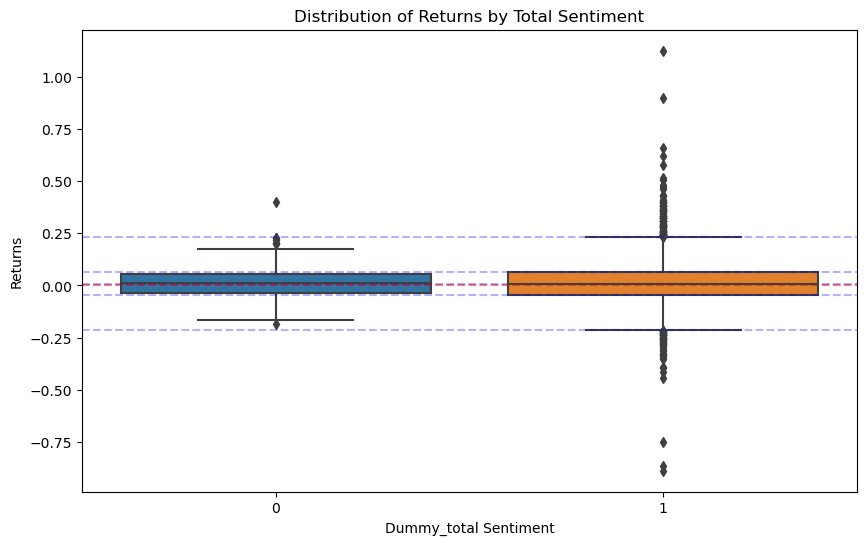

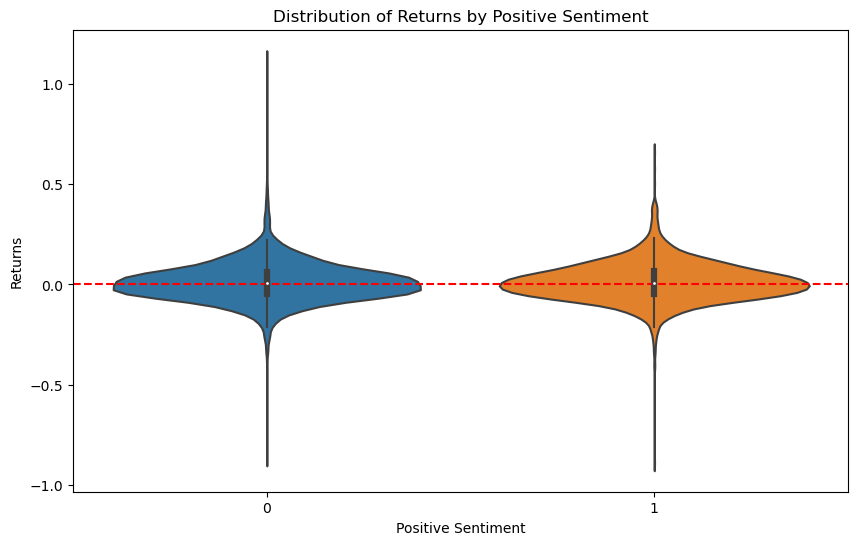

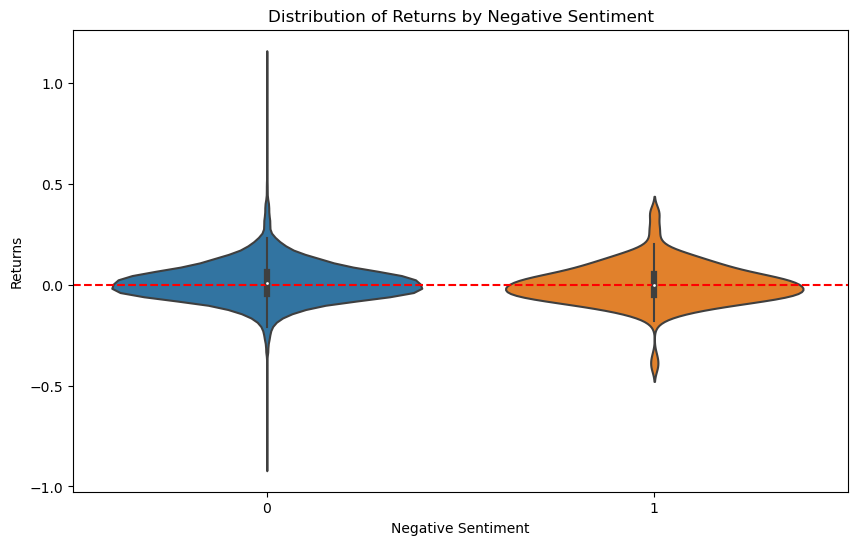

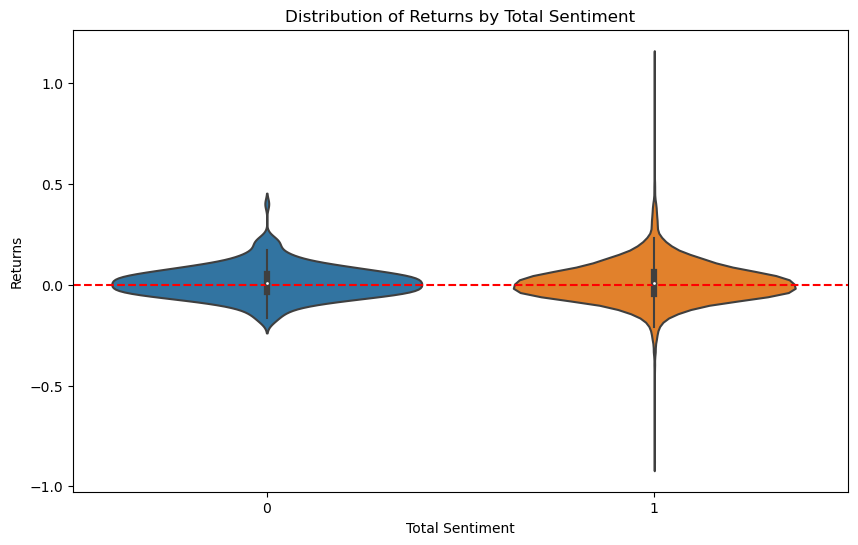

In [9]:
# Box plot for dummy_positive
plot_with_lines(sp500, 'dummy_positive', 'next_month_return', 'Distribution of Returns by Positive Sentiment')

# Box plot for dummy_negative
plot_with_lines(sp500, 'dummy_negative', 'next_month_return', 'Distribution of Returns by Negative Sentiment')

# Box plot for dummy_total
plot_with_lines(sp500, 'dummy_total', 'next_month_return', 'Distribution of Returns by Total Sentiment')

# Violin plot for dummy_positive
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_positive', y='next_month_return', data=sp500)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Positive Sentiment')
plt.xlabel('Positive Sentiment')
plt.ylabel('Returns')
plt.show()

# Violin plot for dummy_negative
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_negative', y='next_month_return', data=sp500)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Negative Sentiment')
plt.xlabel('Negative Sentiment')
plt.ylabel('Returns')
plt.show()

# Violin plot for dummy_total
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_total', y='next_month_return', data=sp500)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Total Sentiment')
plt.xlabel('Total Sentiment')
plt.ylabel('Returns')
plt.show()

In [10]:
from scipy.stats import ttest_ind, mannwhitneyu

# Define a function to remove outliers using Z-score
def remove_outliers(df, column, threshold=3):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    df_filtered = df[(z_scores.abs() < threshold)]
    return df_filtered

# Remove outliers from the sp500 DataFrame
sp500 = remove_outliers(sp500, 'Ask_minus_Bid')
sp500 = remove_outliers(sp500, 'VOL')
sp500.to_csv('monthly_sp500_regression.csv', index=False)

# Calculate mean and standard deviation (volatility) for each combination of dummy variables
mean_negative = sp500[sp500['dummy_negative'] == 1]['Ask_minus_Bid'].mean()
std_negative = sp500[sp500['dummy_negative'] == 1]['Ask_minus_Bid'].std()

mean_positive = sp500[sp500['dummy_positive'] == 1]['Ask_minus_Bid'].mean()
std_positive = sp500[sp500['dummy_positive'] == 1]['Ask_minus_Bid'].std()

mean_total = sp500[sp500['dummy_total'] == 1]['Ask_minus_Bid'].mean()
std_total = sp500[sp500['dummy_total'] == 1]['Ask_minus_Bid'].std()

# Calculate mean and standard deviation (volatility) when the dummy variables are equal to zero
mean_negative_zero = sp500[sp500['dummy_negative'] == 0]['Ask_minus_Bid'].mean()
std_negative_zero = sp500[sp500['dummy_negative'] == 0]['Ask_minus_Bid'].std()

mean_positive_zero = sp500[sp500['dummy_positive'] == 0]['Ask_minus_Bid'].mean()
std_positive_zero = sp500[sp500['dummy_positive'] == 0]['Ask_minus_Bid'].std()

mean_total_zero = sp500[sp500['dummy_total'] == 0]['Ask_minus_Bid'].mean()
std_total_zero = sp500[sp500['dummy_total'] == 0]['Ask_minus_Bid'].std()

# t-test for mean difference
t_statistic_mean_negative, p_value_mean_negative = ttest_ind(sp500[sp500['dummy_negative'] == 1]['Ask_minus_Bid'],
                                                             sp500[sp500['dummy_negative'] == 0]['Ask_minus_Bid'])

t_statistic_mean_positive, p_value_mean_positive = ttest_ind(sp500[sp500['dummy_positive'] == 1]['Ask_minus_Bid'],
                                                             sp500[sp500['dummy_positive'] == 0]['Ask_minus_Bid'])

t_statistic_mean_total, p_value_mean_total = ttest_ind(sp500[sp500['dummy_total'] == 1]['Ask_minus_Bid'],
                                                       sp500[sp500['dummy_total'] == 0]['Ask_minus_Bid'])

# Mann-Whitney U test for difference in volatility
u_statistic_vol_negative, p_value_vol_negative = mannwhitneyu(sp500[sp500['dummy_negative'] == 1]['Ask_minus_Bid'],
                                                              sp500[sp500['dummy_negative'] == 0]['Ask_minus_Bid'])

u_statistic_vol_positive, p_value_vol_positive = mannwhitneyu(sp500[sp500['dummy_positive'] == 1]['Ask_minus_Bid'],
                                                              sp500[sp500['dummy_positive'] == 0]['Ask_minus_Bid'])

u_statistic_vol_total, p_value_vol_total = mannwhitneyu(sp500[sp500['dummy_total'] == 1]['Ask_minus_Bid'],
                                                        sp500[sp500['dummy_total'] == 0]['Ask_minus_Bid'])

# Create a DataFrame to display the results
data = {
    'Dummy': ['Negative', 'Positive', 'Total'],
    'Mean_with_Dummy': [mean_negative, mean_positive, mean_total],
    'Mean_without_Dummy': [mean_negative_zero, mean_positive_zero, mean_total_zero],
    'Volatility_with_Dummy': [std_negative, std_positive, std_total],
    'Volatility_without_Dummy': [std_negative_zero, std_positive_zero, std_total_zero],
    'Mean_Difference': [mean_negative - mean_negative_zero,
                        mean_positive - mean_positive_zero,
                        mean_total - mean_total_zero],
    'Volatility_Difference': [std_negative - std_negative_zero,
                              std_positive - std_positive_zero,
                              std_total - std_total_zero],
    'Mean_P_value': [p_value_mean_negative, p_value_mean_positive, p_value_mean_total],
    'Volatility_P_value': [p_value_vol_negative, p_value_vol_positive, p_value_vol_total]
}
df_results = pd.DataFrame(data)

# Display the results
print(df_results)

      Dummy  Mean_with_Dummy  Mean_without_Dummy  Volatility_with_Dummy  \
0  Negative        23.870128           24.277131              39.161828   
1  Positive        23.194248           24.997619              36.976281   
2     Total        23.763244           32.840701              44.338308   

   Volatility_without_Dummy  Mean_Difference  Volatility_Difference  \
0                 48.554147        -0.407003              -9.392318   
1                 54.603468        -1.803372             -17.627187   
2                 91.720574        -9.077458             -47.382266   

   Mean_P_value  Volatility_P_value  
0      0.894868            0.378221  
1      0.160269            0.002803  
2      0.001083            0.879530  


In [11]:
# Specify the columns for which to calculate z-scores
columns_to_standardize = ['BIDLO', 'ASKHI', 'PRC', 'VOL', 'RET', 'SHROUT', 'sprtrn', 'market_cap', 'last_month_return', '1_month_ma', '2_month_ma', 
                          '3_month_ma', 'Ask_minus_Bid', 'last_month_volume']

# Group by ticker and standardize each group for specified columns
sp500_grouped = sp500.groupby('TICKER')[columns_to_standardize]

# Define a function to standardize values within each group
def standardize_group(group):
    group_std = (group - group.mean()) / group.std()
    return group_std

# Apply the standardization function to each group
sp500_standardized = sp500_grouped.transform(standardize_group)

# Replace original values with standardized values in the original DataFrame
sp500[columns_to_standardize] = sp500_standardized

# Check the modified DataFrame
print(sp500.head())

  TICKER       date   SICCD                    COMNAM  market_cap    SHROUT  \
0      A 2023-01-31  3825.0  AGILENT TECHNOLOGIES INC    1.793228  0.830782   
1      A 2023-02-28  3825.0  AGILENT TECHNOLOGIES INC    1.487220  0.830782   
2      A 2023-03-31  3825.0  AGILENT TECHNOLOGIES INC    0.598013  0.819430   
3      A 2023-04-30  3826.0  AGILENT TECHNOLOGIES INC    0.639969  0.569702   
4      A 2023-05-31  3826.0  AGILENT TECHNOLOGIES INC   -0.030178  0.559246   

        VOL       PRC     ASKHI     BIDLO  ...  last_month_volume  1_month_ma  \
0 -1.520034  1.795351  1.713211  1.686809  ...                NaN    1.795351   
1 -1.539518  1.483281  1.548013  1.382973  ...          -1.468660    1.483281   
2 -0.481976  0.576985  0.687603  0.639317  ...          -1.487272    0.576985   
3 -1.002431  0.631267  0.401041  0.631526  ...          -0.477091    0.631267   
4  0.712503 -0.052604  0.088033 -0.418793  ...          -0.974238   -0.052604   

   2_month_ma  3_month_ma  proper?  As

Kurtosis:
BIDLO               -0.636663
ASKHI               -0.734746
PRC                 -0.728508
VOL                  0.026046
RET                 -0.575376
SHROUT              -0.593917
sprtrn              -1.095274
market_cap          -0.722836
last_month_return   -0.566609
1_month_ma          -0.728508
2_month_ma          -0.860473
3_month_ma          -0.993740
Ask_minus_Bid        0.168519
last_month_volume   -0.030839
dtype: float64

Skewness:
BIDLO                0.099773
ASKHI                0.043512
PRC                  0.101892
VOL                  0.614333
RET                  0.153315
SHROUT              -0.052575
sprtrn               0.017434
market_cap           0.113019
last_month_return    0.197257
1_month_ma           0.101892
2_month_ma           0.050884
3_month_ma          -0.037472
Ask_minus_Bid        0.757108
last_month_volume    0.601923
dtype: float64


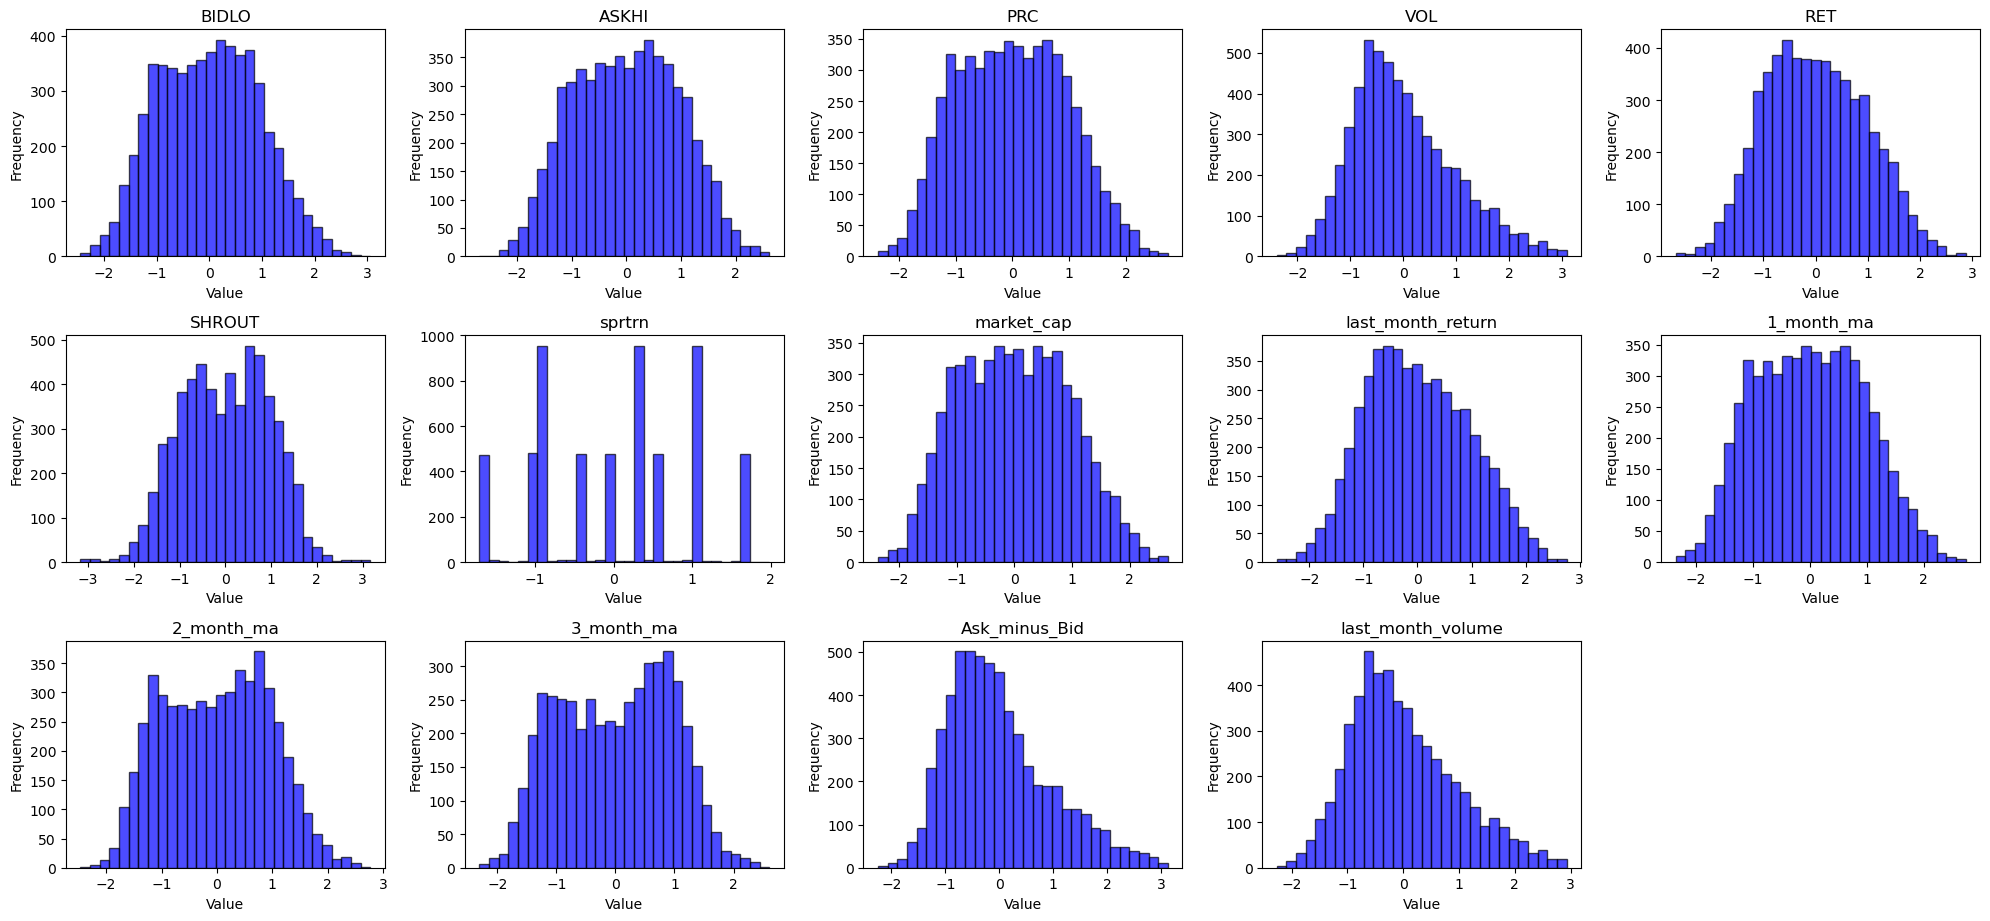

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate kurtosis and skewness for each numeric variable
numeric_columns = ['BIDLO', 'ASKHI', 'PRC', 'VOL', 'RET', 'SHROUT', 'sprtrn', 'market_cap', 'last_month_return', 
                   '1_month_ma', '2_month_ma', '3_month_ma', 'Ask_minus_Bid', 'last_month_volume']
kurtosis_values = sp500[numeric_columns].kurtosis()
skewness_values = sp500[numeric_columns].skew()

# Print kurtosis and skewness values for each numeric variable
print("Kurtosis:")
print(kurtosis_values)
print("\nSkewness:")
print(skewness_values)

# Plot histograms for each numeric variable
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 5, i)
    plt.hist(sp500[col], bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [13]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5820 entries, 0 to 5959
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TICKER             5820 non-null   object        
 1   date               5820 non-null   datetime64[ns]
 2   SICCD              5820 non-null   float64       
 3   COMNAM             5820 non-null   object        
 4   market_cap         5819 non-null   float64       
 5   SHROUT             5793 non-null   float64       
 6   VOL                5819 non-null   float64       
 7   PRC                5819 non-null   float64       
 8   ASKHI              5819 non-null   float64       
 9   BIDLO              5819 non-null   float64       
 10  total              5820 non-null   float64       
 11  negative           5820 non-null   float64       
 12  positive           5820 non-null   float64       
 13  sprtrn             5819 non-null   float64       
 14  RET     

In [14]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector

# Convert specified columns to categorical
sp500['SICCD'] = sp500['SICCD'].astype('category')
sp500['comp_size'] = sp500['comp_size'].astype('category')
sp500['proper?'] = sp500['proper?'].astype('category')
sp500['dummy_negative'] = sp500['dummy_negative'].astype('category')
sp500['dummy_positive'] = sp500['dummy_positive'].astype('category')
sp500['dummy_total'] = sp500['dummy_total'].astype('category')

sp500.to_csv('standardized_monthly_sp500_regression.csv', index=False)
sp500_clean = sp500.dropna()

# Select features and target variable
features = sp500_clean.drop(columns=['next_month_return', 'TICKER', 'COMNAM', 'date'])
target = sp500_clean['next_month_return']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, selector(dtype_exclude="object")),
        ('cat', categorical_transformer, selector(dtype_include="object"))
    ])

# Define LassoCV model
lasso_cv = LassoCV(cv=5, random_state=42)

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('lasso', lasso_cv)])

# Fit the model
pipeline.fit(X_train, y_train)

# Print the best alpha
print("Best alpha:", pipeline.named_steps['lasso'].alpha_)

# Print the R^2 score
print("R^2 score:", pipeline.score(X_test, y_test))

# Access the model coefficients
model_coefs = pipeline.named_steps['lasso'].coef_
print("Model coefficients:", model_coefs)

Best alpha: 8.421774279196767e-05
R^2 score: 0.2873215690194548
Model coefficients: [-2.30236445e-04 -8.58561276e-03 -3.23447938e-03 -4.43661766e-03
  1.34801412e-03 -5.93385265e-03 -2.58588708e-02  7.98276838e-03
  2.59871194e-03 -4.67417731e-03  2.64505445e-02 -3.24706133e-02
 -2.34018206e-02 -9.17919663e-03  3.86496334e-02 -1.17587442e-02
 -3.15516726e-02  1.14492186e-02 -2.29992657e-03 -2.08569536e-03
 -5.29884215e-03 -8.88389596e-04  8.06771814e-05]


In [15]:
sp500 = sp500.dropna()

# Add a new column 'pred_lasso' to the sp500 dataframe with predictions
sp500['pred_lasso'] = pipeline.predict(sp500.drop(columns=['tomorrow_return', 'TICKER', 'COMNAM', 'date']))

# Display the first few rows of the dataframe to verify the new column
print(sp500.head())

plt.hist(sp500['pred_lasso'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Predicted Lasso Distribution')
plt.xlabel('Predicted Lasso Returns')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

KeyError: "['tomorrow_return'] not found in axis"

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=12)

# Create pipeline
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('random_forest', rf_model)])

# Define parameter grid
param_grid = {
    'random_forest__n_estimators': [50, 100],
    'random_forest__max_depth': [None, 10],
    'random_forest__min_samples_split': [2, 5],
    'random_forest__min_samples_leaf': [1, 2]
}

# Perform grid search with reduced parameters and folds
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Print the best R^2 score
print("Best R^2 score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)
print("Test set R^2 score of the best model:", test_score)
